#  Fast Approximation Spectral-based Graph Convolutional Networks.
Sources :

SEMI-SUPERVISED CLASSIFICATION WITH
GRAPH CONVOLUTIONAL NETWORKS: https://arxiv.org/pdf/1609.02907.pdf

Graph gourier transform: https://users.ece.cmu.edu/~asandryh/papers/icassp13a.pdf

$H^{l+1}=\sigma (\tilde{D}^{-1/2}\tilde{A}\tilde{D}^{-1/2}H^{(l)}W^{(l)})$

where $ \tilde{A} = A+I_{n}$

$\tilde{D}=\sum_{i}\tilde{A}_{ij}$

$H^{(l)}$ is the $l$-th hidden layer and $W^{(l)}$ the weigths.

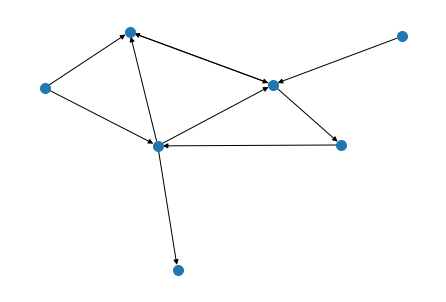

In [18]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# create a graph and plot it
G = nx.fast_gnp_random_graph(7, 0.20, 3, 3)
nx.draw(G, cmap = plt.get_cmap('jet'), node_size=100);
plt.show();

In [69]:
# Adjacency matrix normalized
A = np.array(nx.adjacency_matrix(G).todense())
# Add self loop
n = A.shape[0]
A_tilde = A + np.eye(n)

# Degree matrix of self loop matrix
D_tilde = np.diag(A_tilde.sum(axis=0))
# Normalize A
A_star = np.linalg.inv(D_tilde) ** 0.5 @ A_tilde @ np.linalg.inv(D_tilde) ** 0.5
print(A_star)

[[0.25       0.35355339 0.         0.         0.         0.25
  0.        ]
 [0.         0.5        0.40824829 0.         0.         0.
  0.        ]
 [0.28867513 0.         0.33333333 0.         0.         0.28867513
  0.40824829]
 [0.5        0.         0.         1.         0.         0.
  0.        ]
 [0.         0.         0.57735027 0.         1.         0.5
  0.        ]
 [0.25       0.         0.         0.         0.         0.25
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.5       ]]


In [71]:
# Normalized Laplacian matrix
L = np.eye(n) - A_star
Λ, U = np.linalg.eigh(L)
Λ

array([-0.38672303, -0.23256175,  0.5       ,  0.5       ,  0.60324831,
        0.89369897,  1.28900416])

In [65]:
# Comparing the two matrix
print(np.linalg.eigh(A_star)[0])
print(np.linalg.eigh(A_tilde)[0])

[-0.46235836  0.55859163  1.          1.          1.          1.44140837
  2.46235836]
[-0.84775907  0.23463314  1.          1.          1.          1.76536686
  2.84775907]
